In [25]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import torch
from transformers import pipeline

#Data Sentimen

In [2]:
df_x1 = pd.read_csv("../data/raw/datasetX-Nuril2(2024-1).csv")
df_x2 = pd.read_csv("../data/raw/datasetX-Nuril3(2024-2).csv")
df_x3 = pd.read_csv("../data/raw/datasetX-Fathir(2025).csv")
df_x4 = pd.read_csv("../data/raw/datasetX-wisnu(2025).csv")

df_combined_x = pd.concat([df_x1, df_x2, df_x3, df_x4], ignore_index=True)
df_combined_x

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1939463308580716816,Sun Jun 29 23:17:40 +0000 2025,0,BERITA POPULER: Harga Emas Antam (ANTM) usai T...,1939463308580716816,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/193946330858071...,238091066,NaN
1,1939393712691511800,Sun Jun 29 18:41:07 +0000 2025,0,Asing Kabur? BBRI &amp; BBCA Diobral! Cek Daft...,1939393712691511800,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/193939371269151...,551806331,NaN
2,1938994684904513894,Sun Jun 29 15:15:53 +0000 2025,0,@sempol99 @pukmimuk @dojjunn Wahhh kata2 yg bi...,1939342060777349543,NaN,sempol99,in,NaN,0,1,0,https://x.com/undefined/status/193934206077734...,228201041,NaN
3,1939118074319470863,Sun Jun 29 14:18:01 +0000 2025,0,@_adlsr @Saham_fess Saham bluechip kaya BBCA B...,1939327500573954488,NaN,_adlsr,in,NaN,0,0,0,https://x.com/undefined/status/193932750057395...,1799696207037820928,NaN
4,1939296828450906426,Sun Jun 29 12:16:08 +0000 2025,5,Sobat BRI Udah siapin apa aja nih buat ke Pram...,1939296828450906426,https://pbs.twimg.com/ext_tw_video_thumb/19392...,NaN,in,NaN,0,2,1,https://x.com/undefined/status/193929682845090...,1398703135,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1922466431439921259,Wed May 14 01:38:09 +0000 2025,0,Penggemar Saham BBRI Makin Banyak Harganya Dir...,1922466431439921259,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192246643143992...,238091066,NaN
2228,1922433308237205551,Tue May 13 23:26:32 +0000 2025,0,BERITA POPULER: Harga Emas Perhiasan Meredup h...,1922433308237205551,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192243330823720...,238091066,NaN
2229,1922428053340188790,Tue May 13 23:05:39 +0000 2025,1,$BBCA $BMRI $BBRI dan $BRIS main aman di perba...,1922428053340188790,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192242805334018...,3070390554,NaN
2230,1922413590163665123,Tue May 13 22:08:11 +0000 2025,0,BERITA POPULER: Harga Emas Perhiasan Meredup h...,1922413590163665123,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192241359016366...,238091066,NaN


In [3]:
df_combined_x = df_combined_x.drop_duplicates(subset='full_text')
df_combined_x

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1939463308580716816,Sun Jun 29 23:17:40 +0000 2025,0,BERITA POPULER: Harga Emas Antam (ANTM) usai T...,1939463308580716816,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/193946330858071...,238091066,NaN
1,1939393712691511800,Sun Jun 29 18:41:07 +0000 2025,0,Asing Kabur? BBRI &amp; BBCA Diobral! Cek Daft...,1939393712691511800,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/193939371269151...,551806331,NaN
2,1938994684904513894,Sun Jun 29 15:15:53 +0000 2025,0,@sempol99 @pukmimuk @dojjunn Wahhh kata2 yg bi...,1939342060777349543,NaN,sempol99,in,NaN,0,1,0,https://x.com/undefined/status/193934206077734...,228201041,NaN
3,1939118074319470863,Sun Jun 29 14:18:01 +0000 2025,0,@_adlsr @Saham_fess Saham bluechip kaya BBCA B...,1939327500573954488,NaN,_adlsr,in,NaN,0,0,0,https://x.com/undefined/status/193932750057395...,1799696207037820928,NaN
4,1939296828450906426,Sun Jun 29 12:16:08 +0000 2025,5,Sobat BRI Udah siapin apa aja nih buat ke Pram...,1939296828450906426,https://pbs.twimg.com/ext_tw_video_thumb/19392...,NaN,in,NaN,0,2,1,https://x.com/undefined/status/193929682845090...,1398703135,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1922466431439921259,Wed May 14 01:38:09 +0000 2025,0,Penggemar Saham BBRI Makin Banyak Harganya Dir...,1922466431439921259,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192246643143992...,238091066,NaN
2228,1922433308237205551,Tue May 13 23:26:32 +0000 2025,0,BERITA POPULER: Harga Emas Perhiasan Meredup h...,1922433308237205551,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192243330823720...,238091066,NaN
2229,1922428053340188790,Tue May 13 23:05:39 +0000 2025,1,$BBCA $BMRI $BBRI dan $BRIS main aman di perba...,1922428053340188790,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192242805334018...,3070390554,NaN
2230,1922413590163665123,Tue May 13 22:08:11 +0000 2025,0,BERITA POPULER: Harga Emas Perhiasan Meredup h...,1922413590163665123,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192241359016366...,238091066,NaN


In [4]:
df_combined_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries, 0 to 2231
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1038 non-null   int64  
 1   created_at               1038 non-null   object 
 2   favorite_count           1038 non-null   int64  
 3   full_text                1038 non-null   object 
 4   id_str                   1038 non-null   int64  
 5   image_url                313 non-null    object 
 6   in_reply_to_screen_name  397 non-null    object 
 7   lang                     1038 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              1038 non-null   int64  
 10  reply_count              1038 non-null   int64  
 11  retweet_count            1038 non-null   int64  
 12  tweet_url                1038 non-null   object 
 13  user_id_str              1038 non-null   int64  
 14  username                 0 no

In [5]:
df_combined_x['created_at'] = pd.to_datetime(df_combined_x['created_at'])

C:\Users\Sobar\AppData\Local\Temp\ipykernel_26968\701149181.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_combined_x['created_at'] = pd.to_datetime(df_combined_x['created_at'])
C:\Users\Sobar\AppData\Local\Temp\ipykernel_26968\701149181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_x['created_at'] = pd.to_datetime(df_combined_x['created_at'])


In [6]:
df_combined_x = df_combined_x.drop(columns=['username', 'user_id_str', 'tweet_url', 'retweet_count', 'reply_count', 'quote_count', 'location', 'in_reply_to_screen_name', 'image_url', 'favorite_count', 'conversation_id_str'])

In [7]:
df_combined_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries, 0 to 2231
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  1038 non-null   datetime64[ns, UTC]
 1   full_text   1038 non-null   object             
 2   id_str      1038 non-null   int64              
 3   lang        1038 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 40.5+ KB


In [8]:
df_combined_x = df_combined_x[df_combined_x['lang'] == 'in']

In [9]:
classifier = pipeline(
    "sentiment-analysis",
    model="w11wo/indonesian-roberta-base-sentiment-classifier",
)

df_combined_x['sentiment_result'] = df_combined_x['full_text'].apply(lambda x: classifier(x)[0])
df_combined_x['sentiment'] = df_combined_x['sentiment_result'].apply(lambda x: x['label'])
df_combined_x['score'] = df_combined_x['sentiment_result'].apply(lambda x: x['score'])

Device set to use cpu


In [10]:
# nli = pipeline("zero-shot-classification", model="joeddav/xlm-roberta-large-xnli")

# def get_subjectivity(text):
#     candidate_labels = ["subjektif", "objektif"]
#     return nli(text, candidate_labels)

# df_combined_x['subjectivity_result'] = df_combined_x['full_text'].apply(get_subjectivity)
# df_combined_x['subjectivity_label'] = df_combined_x['subjectivity_result'].apply(lambda x: x['labels'][0])
# df_combined_x['subjectivity_score'] = df_combined_x['subjectivity_result'].apply(lambda x: x['scores'][0])

In [11]:
dataset_sentiment = df_combined_x.sort_values(by='created_at', ascending=False)
dataset_sentiment

,created_at,full_text,id_str,lang,sentiment_result,sentiment,score
719,2025-07-04 14:30:19+00:00,@PrepaTAP JP Morgan jual BBCA &amp; BMRI tapi ...,1941142533721227304,in,"{'label': 'negative', 'score': 0.9968525767326...",negative,0.996853
720,2025-07-04 14:30:01+00:00,@PrepaTAP Koreksi BBRI cuma diskon. Siap-siap ...,1941142458395697514,in,"{'label': 'neutral', 'score': 0.7523908019065857}",neutral,0.752391
721,2025-07-04 14:29:56+00:00,@PrepaTAP Target 4700 makin kebuka nih! Gas po...,1941142439630413904,in,"{'label': 'neutral', 'score': 0.9513648152351379}",neutral,0.951365
722,2025-07-04 14:29:46+00:00,@PrepaTAP Fix BBRI makin solid kepercayaan glo...,1941142394822652248,in,"{'label': 'neutral', 'score': 0.5241761803627014}",neutral,0.524176
723,2025-07-04 14:28:48+00:00,@PrepaTAP Hold BBRI = tidur nyenyak bangun ban...,1941142150911242471,in,"{'label': 'neutral', 'score': 0.9927531480789185}",neutral,0.992753
...,...,...,...,...,...,...,...
714,2025-05-04 05:44:38+00:00,Kalo pure investasi kayaknya gini sih: 200 tar...,1918904583017079052,in,"{'label': 'neutral', 'score': 0.9961339235305786}",neutral,0.996134
715,2025-05-04 04:05:43+00:00,Beli saham $BBRI 3 minggu lagi jual lagi. Haru...,1918879689235468691,in,"{'label': 'negative', 'score': 0.9868059158325...",negative,0.986806
716,2025-05-04 02:58:50+00:00,@MrOngDedy Beli saham BBRI,1918862858617749609,in,"{'label': 'neutral', 'score': 0.9526646137237549}",neutral,0.952665
717,2025-05-04 02:22:19+00:00,Easy. I will manage it by: - 250juta di reksad...,1918853667404603435,in,"{'label': 'positive', 'score': 0.8750272393226...",positive,0.875027


In [26]:
sentiment_counts = dataset_sentiment['sentiment'].value_counts()
sentiment_counts

sentiment
neutral     736
negative    159
positive    141
Name: count, dtype: int64

C:\Users\Sobar\AppData\Local\Temp\ipykernel_26968\2336471055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


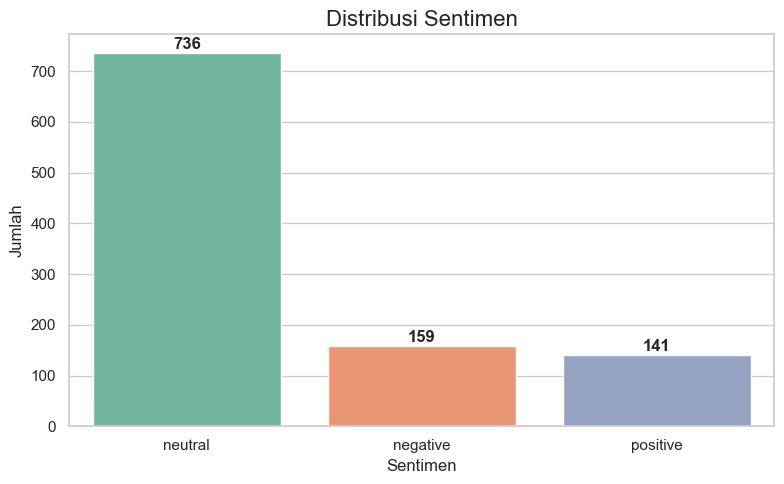

In [27]:
# Set style
sns.set(style='whitegrid')

# Buat barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')

# Tambahkan judul dan label
plt.title('Distribusi Sentimen', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tambahkan nilai di atas bar
for i, val in enumerate(sentiment_counts.values):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
dataset_sentiment.to_csv('../data/processed/dataset_sentiment.csv', index=False)

#Data Historis

In [14]:
dataset_historis = pd.read_csv("../data/processed/dataset_historis.csv")
dataset_historis

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,04/07/2025,3.67,3.68,3.71,3.65,"91,14M","-0,27%"
1,03/07/2025,3.68,3.71,3.73,3.68,"119,67M","0,00%"
2,02/07/2025,3.68,3.65,3.70,3.64,"220,27M","-0,54%"
3,01/07/2025,3.70,3.78,3.79,3.67,"212,37M","-1,07%"
4,30/06/2025,3.74,3.84,3.84,3.73,"271,93M","-2,35%"
5,26/06/2025,3.83,3.78,3.83,3.75,"171,43M","1,86%"
6,25/06/2025,3.76,3.83,3.83,3.73,"164,26M","-0,53%"
7,24/06/2025,3.78,3.82,3.90,3.77,"281,59M","1,61%"
8,23/06/2025,3.72,3.73,3.75,3.66,"222,07M","-1,85%"
9,20/06/2025,3.79,3.74,3.84,3.74,"516,18M","-0,26%"


In [15]:
dataset_historis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     39 non-null     object 
 1   Terakhir    39 non-null     float64
 2   Pembukaan   39 non-null     float64
 3   Tertinggi   39 non-null     float64
 4   Terendah    39 non-null     float64
 5   Vol.        39 non-null     object 
 6   Perubahan%  39 non-null     object 
dtypes: float64(4), object(3)
memory usage: 2.3+ KB


In [16]:
dataset_historis['Tanggal'] = pd.to_datetime(dataset_historis['Tanggal'], dayfirst=True, errors='coerce')

In [17]:
dataset_sentiment['date'] = dataset_sentiment['created_at'].dt.date
dataset_historis['date'] = pd.to_datetime(dataset_historis['Tanggal']).dt.date

In [18]:
sentiment_sign = {'positive': 1, 'neutral': 0, 'negative': -1}
dataset_sentiment['sentiment_sign'] = dataset_sentiment['sentiment'].map(sentiment_sign)

dataset_sentiment['signed_score'] = dataset_sentiment['sentiment_sign'] * dataset_sentiment['score']

In [19]:
dataset_grouped = dataset_sentiment.groupby('date').agg(
    avg_signed_sentiment=('signed_score', 'mean'),
    count_positive=('sentiment', lambda x: (x=='positive').sum()),
    count_negative=('sentiment', lambda x: (x=='negative').sum()),
    count_neutral=('sentiment', lambda x: (x=='neutral').sum()),
    total_tweets=('sentiment', 'count')
).reset_index()

In [20]:
dataset_model = pd.merge(dataset_historis, dataset_grouped, on='date', how='left')

In [21]:
dataset_model

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,date,avg_signed_sentiment,count_positive,count_negative,count_neutral,total_tweets
0,2025-07-04,3.67,3.68,3.71,3.65,"91,14M","-0,27%",2025-07-04,-0.000960,4.0,3.0,54.0,61.0
1,2025-07-03,3.68,3.71,3.73,3.68,"119,67M","0,00%",2025-07-03,0.052033,5.0,3.0,21.0,29.0
2,2025-07-02,3.68,3.65,3.70,3.64,"220,27M","-0,54%",2025-07-02,-0.007767,2.0,2.0,16.0,20.0
3,2025-07-01,3.70,3.78,3.79,3.67,"212,37M","-1,07%",2025-07-01,-0.018503,4.0,4.0,16.0,24.0
4,2025-06-30,3.74,3.84,3.84,3.73,"271,93M","-2,35%",2025-06-30,-0.124553,0.0,2.0,12.0,14.0
5,2025-06-26,3.83,3.78,3.83,3.75,"171,43M","1,86%",2025-06-26,0.198789,1.0,0.0,4.0,5.0
6,2025-06-25,3.76,3.83,3.83,3.73,"164,26M","-0,53%",2025-06-25,-0.072154,0.0,1.0,11.0,12.0
7,2025-06-24,3.78,3.82,3.90,3.77,"281,59M","1,61%",2025-06-24,0.000000,0.0,0.0,15.0,15.0
8,2025-06-23,3.72,3.73,3.75,3.66,"222,07M","-1,85%",2025-06-23,-0.374837,0.0,6.0,8.0,14.0
9,2025-06-20,3.79,3.74,3.84,3.74,"516,18M","-0,26%",2025-06-20,-0.111262,2.0,3.0,10.0,15.0


In [22]:
dataset_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tanggal               39 non-null     datetime64[ns]
 1   Terakhir              39 non-null     float64       
 2   Pembukaan             39 non-null     float64       
 3   Tertinggi             39 non-null     float64       
 4   Terendah              39 non-null     float64       
 5   Vol.                  39 non-null     object        
 6   Perubahan%            39 non-null     object        
 7   date                  39 non-null     object        
 8   avg_signed_sentiment  38 non-null     float64       
 9   count_positive        38 non-null     float64       
 10  count_negative        38 non-null     float64       
 11  count_neutral         38 non-null     float64       
 12  total_tweets          38 non-null     float64       
dtypes: datetime64[ns](1), 

In [23]:
dataset_model.describe()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,avg_signed_sentiment,count_positive,count_negative,count_neutral,total_tweets
count,39,39.000000,39.000000,39.000000,39.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,2025-06-03 19:41:32.307692288,4.004359,4.018205,4.055385,3.961795,-0.021298,2.842105,3.105263,15.026316,20.973684
min,2025-05-02 00:00:00,3.670000,3.650000,3.700000,3.640000,-0.374837,0.000000,0.000000,3.000000,5.000000
25%,2025-05-19 12:00:00,3.795000,3.835000,3.870000,3.765000,-0.125760,1.000000,1.000000,10.000000,14.000000
50%,2025-06-04 00:00:00,3.990000,4.000000,4.030000,3.960000,-0.012669,2.000000,2.500000,12.500000,17.000000
75%,2025-06-19 12:00:00,4.205000,4.220000,4.270000,4.145000,0.047222,4.000000,4.000000,17.750000,25.750000
max,2025-07-04 00:00:00,4.450000,4.370000,4.450000,4.330000,0.331064,18.000000,12.000000,54.000000,70.000000
std,NaN,0.228874,0.219795,0.223923,0.214450,0.146523,3.405293,2.993592,9.936248,13.835885


In [ ]:
dataset_model.to_csv('../data/processed/dataset_model.csv', index=False)